# Seaborn

Seaborn is a nice library for make easy statistical plots  
Seaborn works great with Pandas Dataframes

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Seaborn Data

Seaborn can easily load some classic/toy datasets to illustrate plotting features.  An internet connection is required to load the data.  

In [2]:
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Line Plot

<Axes: xlabel='year', ylabel='passengers'>

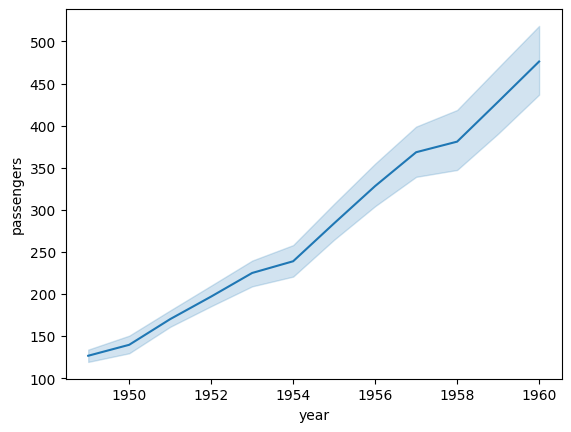

In [6]:
sns.lineplot(data = flights, x = 'year', y = 'passengers')

# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* histplot
* displot
* jointplot
* pairplot
* rugplot

You can use the dataset and call variables by name, or specifically designate a series as input.

<Axes: xlabel='sepal_length', ylabel='Count'>

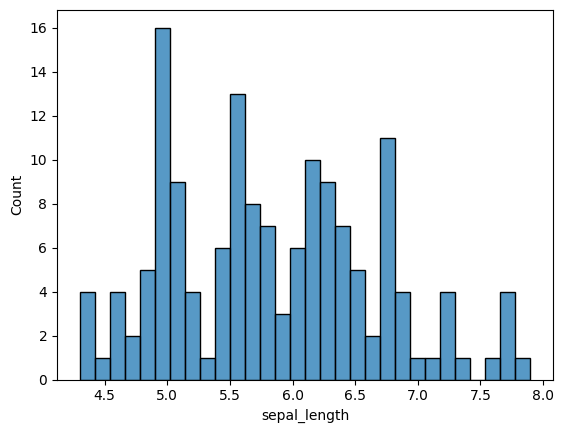

In [7]:
# Pass in full dataset
sns.histplot(data = iris, x = 'sepal_length', bins = 30)

<Axes: xlabel='sepal_length', ylabel='Count'>

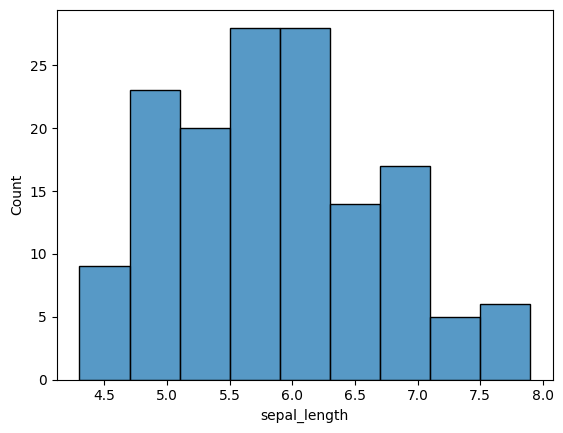

In [8]:
# Pass in a series
sns.histplot(x = iris['sepal_length'])

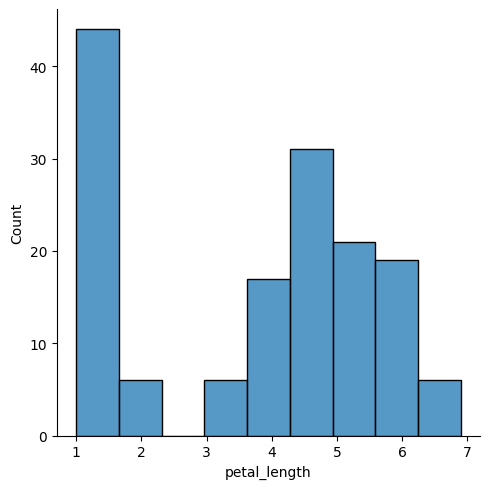

In [9]:
sns.displot(data=iris, x='petal_length')

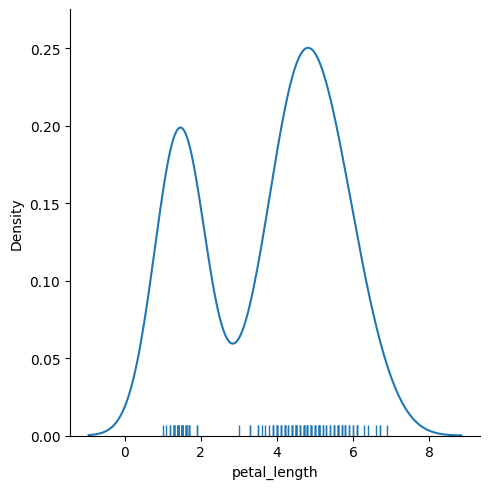

In [10]:
sns.displot(data = iris, x = 'petal_length', kind = 'kde', rug = True)


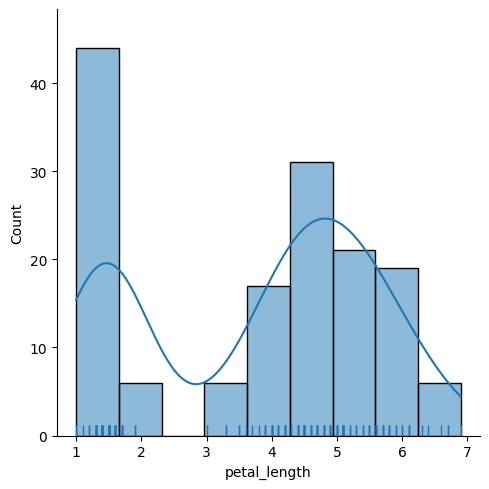

In [11]:
sns.displot(data = iris, x = 'petal_length', rug = True, kde = True)

More on displot can be found here: [Displot](https://seaborn.pydata.org/generated/seaborn.displot.html)

## jointplot

jointplot() allows you to basically match up two distplots for **bivariate** data (two variables). With your choice of what **kind** parameter to compare with:
* “scatter”
* “reg”
* “resid”
* “kde”
* “hex”

`sns.jointplot(x='',y='',data=,kind='')`

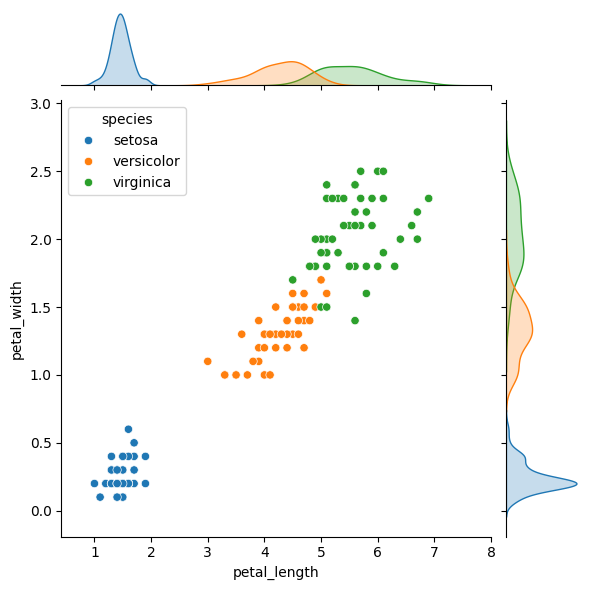

In [12]:
sns.jointplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')

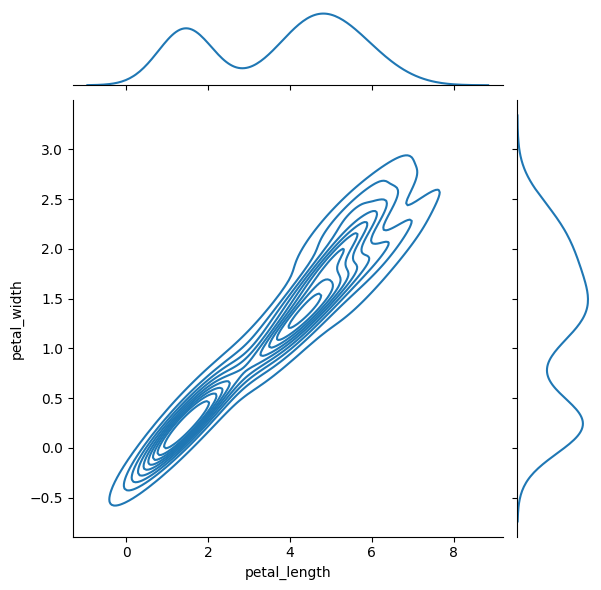

In [13]:
sns.jointplot(data = iris, x = 'petal_length', y = 'petal_width', kind = 'kde')

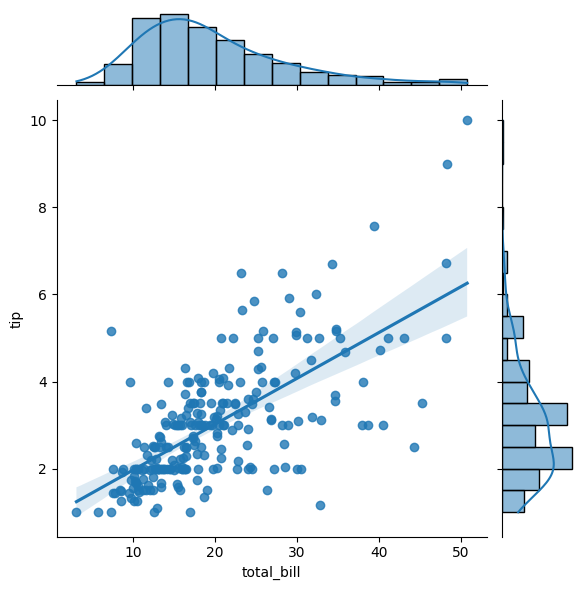

In [14]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'reg')

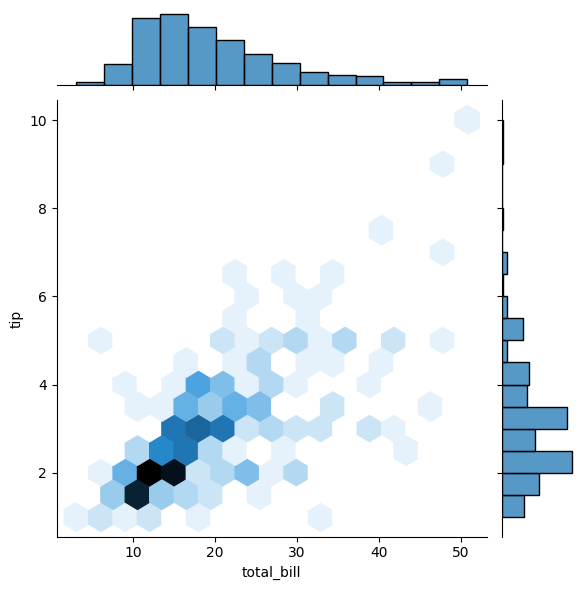

In [15]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'hex')

## Updating figure attributes

Text(0.5, 1, 'Scatterplot of Petal Length and Petal Width')

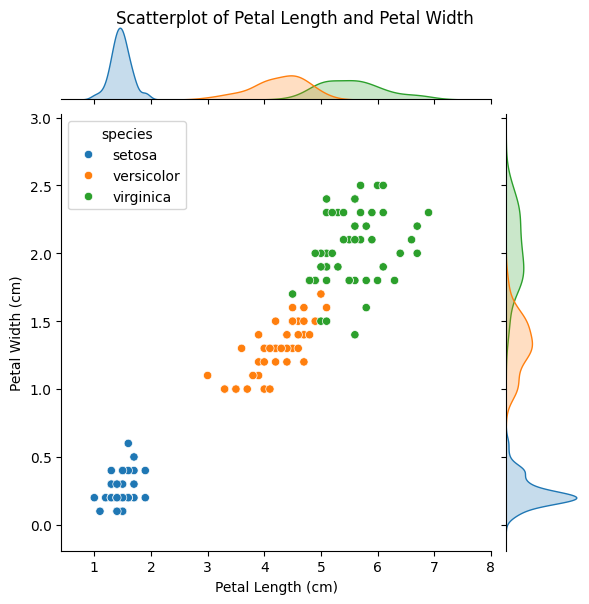

In [16]:
# Save the axes (similar to use in matplotlib)
g = sns.jointplot(data=iris, x='petal_length', y='petal_width', hue='species')
g.set_axis_labels('Petal Length (cm)', 'Petal Width (cm)')
g.fig.suptitle('Scatterplot of Petal Length and Petal Width', y = 1)

Since seaborn is built on matplotlib, you can use the axes object to set the labels and title.

Text(0.5, 1.0, 'Scatterplot of Petal Length and Petal Width')

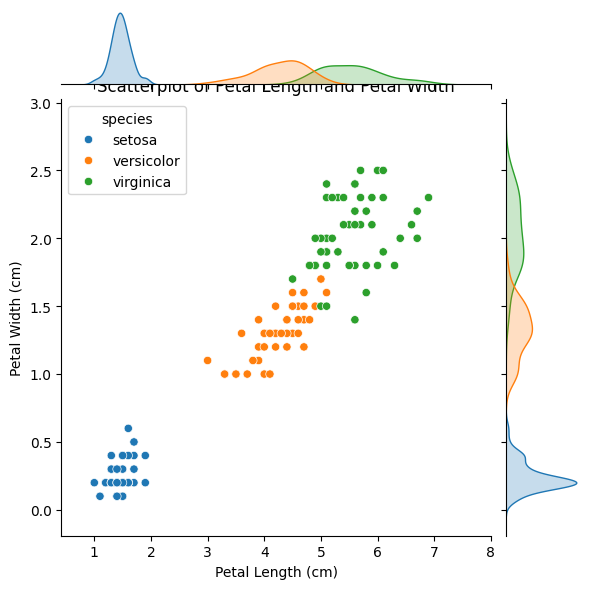

In [17]:
g = sns.jointplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatterplot of Petal Length and Petal Width')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

``sns.pairplot(data)``  
``sns.pairplot(data, hue= , palette="")``

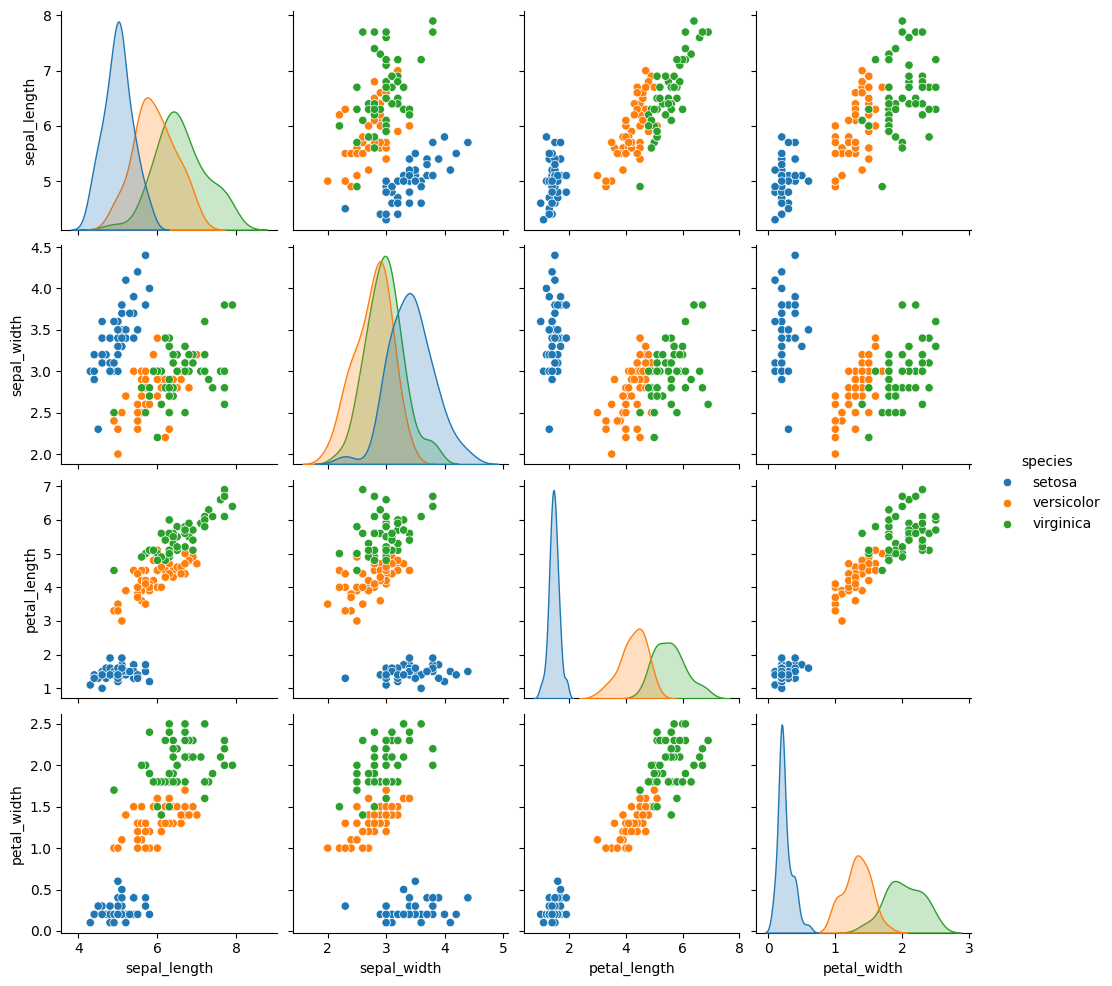

In [18]:
sns.pairplot(data = iris, hue = 'species')

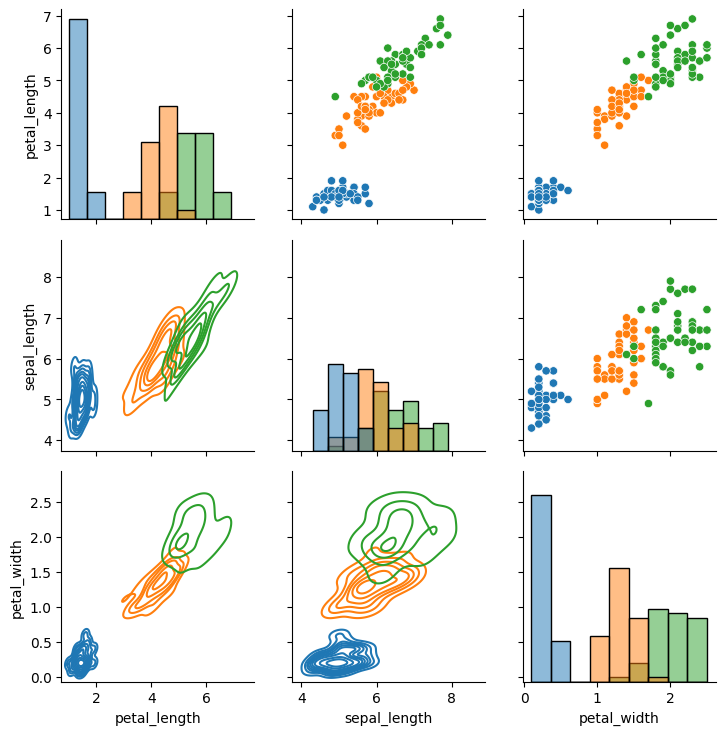

In [19]:
# Customize the variables and mapped functions
g = sns.PairGrid(data = iris, hue = 'species', vars = ['petal_length', 'sepal_length', 'petal_width'])
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

## boxplot and violinplot

#### boxplot
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

``sns.boxplot(x="", y="", data= ,palette="")``

``sns.boxplot(data= ,palette=' ',orient=' ')``

``sns.boxplot(x=" ", y=" ", hue=" ", data= , palette=" ")``

#### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

`sns.violinplot(x="<cat>", y="<num>", data= , palette=' ')`

`sns.violinplot(x="<cat>", y="<num>", data= , hue=' ', palette=' ')`

`sns.violinplot(x="<cat>", y="<num>", data= , hue=' ', split=(boolean), palette=' ')`

<Axes: xlabel='tip', ylabel='sex'>

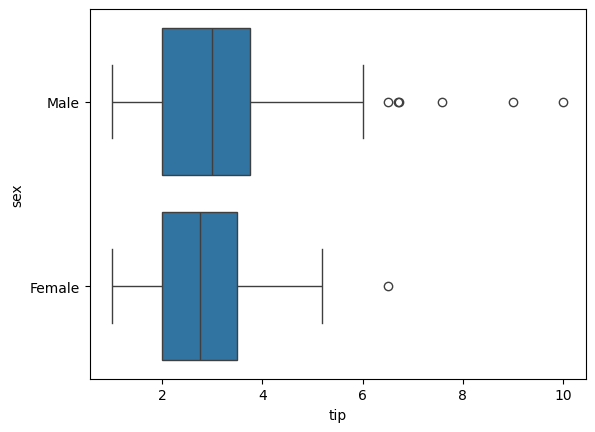

In [20]:
sns.boxplot(data = tips, y = 'sex', x = 'tip', orient = 'horizontal')

In [21]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

<Axes: xlabel='sex', ylabel='tip_pct'>

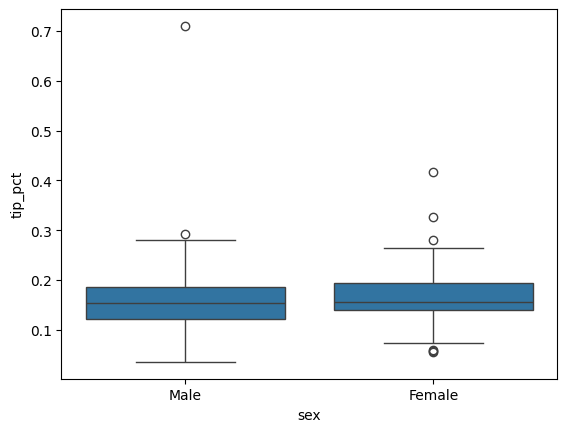

In [22]:
sns.boxplot(data = tips, x = 'sex', y = 'tip_pct')

<Axes: xlabel='sex', ylabel='tip_pct'>

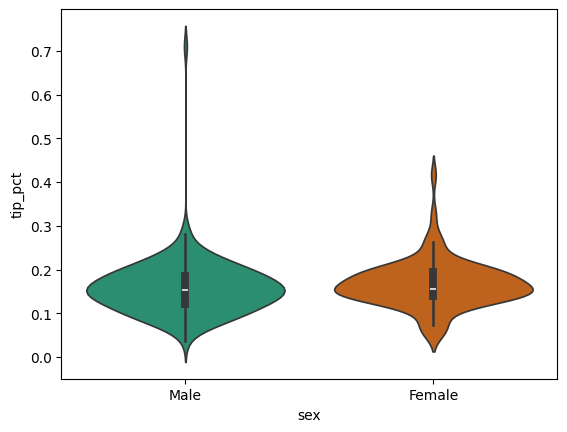

In [23]:
sns.violinplot(data = tips, x = 'sex', y = 'tip_pct',  hue = 'sex', palette = 'Dark2')

## stripplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.


``sns.stripplot(x="<cat>", y="<num>", data= , jitter=<bool>)``

``sns.stripplot(x="<cat>", y="<num>", data= ,jitter=<bool>,hue='<cat>',palette=' ',split=<bool>)``

<Axes: xlabel='day', ylabel='total_bill'>

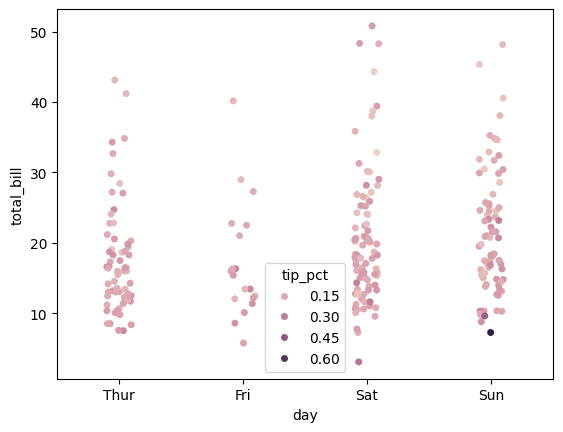

In [24]:
sns.stripplot(data = tips, x = 'day', y = 'total_bill', hue = 'tip_pct')

<Axes: xlabel='day', ylabel='total_bill'>

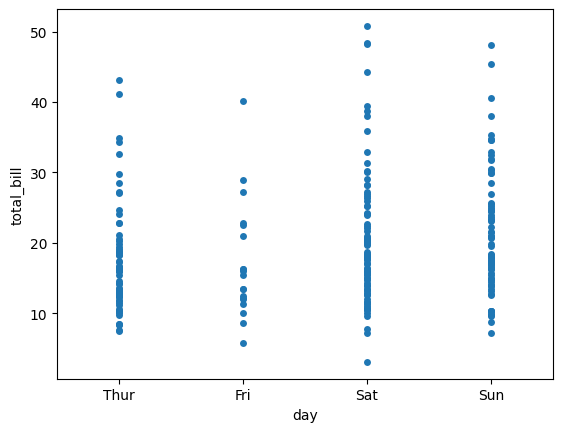

In [25]:
sns.stripplot(data = tips, x = 'day', y = 'total_bill', jitter = False)

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data!

* barplot
* countplot

``sns.barplot(x='<cat>',y='<num>',data= , estimator= <default is mean>)``

``sns.countplot(x='<cat>',data=tips)``

<Axes: xlabel='sex', ylabel='tip'>

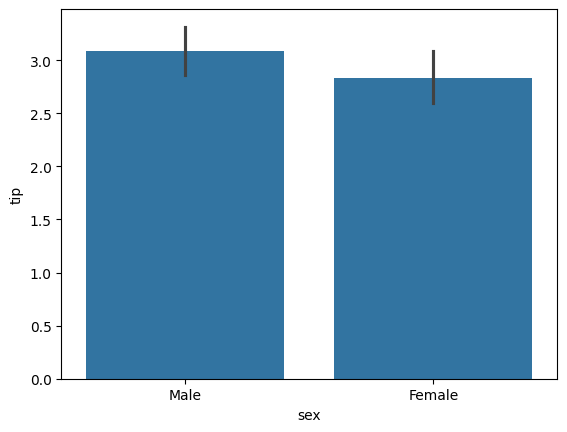

In [26]:
sns.barplot(data = tips, x = 'sex', y = 'tip')

<Axes: xlabel='sex', ylabel='count'>

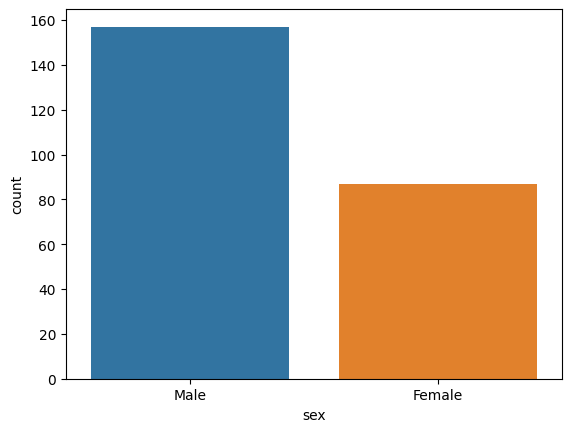

In [27]:
sns.countplot(data = tips, x = 'sex', hue = 'sex')

# Plots for "Matrix" Data

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data.

`sns.heatmap(matrix)`

`sns.heatmap(matrix, cmap=' ', annot=<bool>)`

`sns.clustermap(matrix)`

In [28]:
from scipy.spatial.distance import pdist, squareform

In [29]:
iris_dists = squareform(pdist(iris.loc[:, iris.columns != 'species']))

<Axes: >

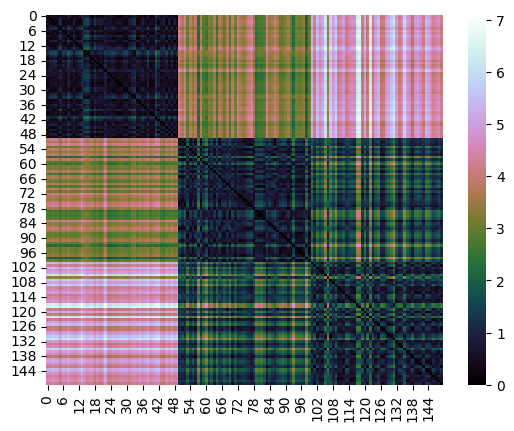

In [30]:
sns.heatmap(iris_dists, cmap = 'cubehelix')

Seaborn colormaps: [colormaps](https://seaborn.pydata.org/tutorial/color_palettes.html)

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature

In [ ]:
sns.histplot()

In [ ]:
g = sns.FacetGrid(tips, col = "time",  row = "smoker")
g = g.map(sns.histplot, "total_bill")

In [ ]:
# Can also use matplotlib plots!
g = sns.FacetGrid(tips, col = "time",  row = "smoker")
g = g.map(plt.hist, "total_bill")

In [ ]:
g = sns.FacetGrid(tips, col = "time",  row = "smoker", hue = 'sex')
# Notice how the arguments come after plt.scatter call: x, y
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

# Regression Plots

Seaborn has many built-in capabilities for regression plots.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

`sns.lmplot(x='<num>',y='<num>', data= )`

`sns.lmplot(x='<num>',y='<nujm>',data= , hue='<cat>', palette=" ")`



In [ ]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip')

## Using a Grid

`lmplot` can easily create facets. Just indicate this with the col or row arguments:

In [ ]:
sns.lmplot(x = "total_bill", y = "tip", row = "sex", col = "time", data = tips)

# Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** (inches) and **aspect** (ratio) parameters.  

sns.lmplot(x = ' ', y = ' ', data = , col = ' ', hue = ' ', palette = ' ', aspect = ,size = )

There is also a **height** parameter that specifies the height of individual facets.

In [ ]:
sns.lmplot(data = iris, x = 'petal_length', y = 'sepal_length', col = 'species',
           hue = 'species', palette = 'Dark2')

## Selecting a palette (color scheme)
We can review the available palettes by calling sns.color_palette().

Seaborn color palettes [here.](https://seaborn.pydata.org/tutorial/color_palettes.html)

Color advice can be found here: [ColorBrewer2](https://colorbrewer2.org/)

In [ ]:
# Example of using hue
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='Dark2')

You can also generate your own color palette using hex codes:

In [ ]:
custom_palette = sns.color_palette(["#A39382", "#002E5D", "#0047BA"]) # Go BYU!
# sns.set_palette(custom_palette) # Set globally

# Example usage with a scatter plot
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette = custom_palette)

Colormaps (cmap) can be set for continuous variables.

In [ ]:
# Example using colormaps for continuous variables
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='sepal_length', palette='viridis')
plt.show()

# Style and Context

`sns.set_style('whitegride')` can take the following styles:  darkgrid, whitegrid, dark, white, or ticks.  Advanced users can customize further.

`sns.set_context('notebook', font_scale = 1)` can take take the following contexts: notebook (default), paper, talk, poster.  The font can also be adjusted.  Advanced users can customize further.

In [ ]:
sns.set_style('whitegrid')
# sns.set_style('darkgrid')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.scatterplot(iris, x = 'petal_length', y = 'petal_width', hue = 'species', ax = axes[0])
sns.scatterplot(iris, x = 'petal_length', y = 'petal_width', hue = 'sepal_length', ax = axes[1])

In [ ]:
sns.histplot(iris, x = 'petal_length', hue = 'species')

`# Your turn!

In this exercise, you will work with the `tips` dataset to explore various aspects of the data using Seaborn.

## Questions:

1. **Distribution of Total Bill:**
    - Plot the distribution of the `total_bill` column using a histogram. Include a rug plot.
    - What is the most common range of total bills?

2. **Tip Percentage by Day:**
    - Create a boxplot to visualize the distribution of `tip_pct` for each day of the week.
    - Which day has the highest median tip percentage?

3. **Total Bill vs Tip:**
    - Create a scatter plot to visualize the relationship between `total_bill` and `tip`.
    - Add a regression line to the scatter plot.
    - Is there a correlation between total bill and tip?

4. **Tip Percentage by Gender and Smoker Status:**
    - Create a violin plot to visualize the distribution of `tip_pct` smoker status.
    - Are there any noticeable differences in tip percentages between smokers and non-smokers?

5. **Facet Grid of Total Bill by Time and Day:**
    - Create a FacetGrid to plot the distribution of `total_bill` for each combination of `time` (Lunch/Dinner) and `day`.
    - Which combination of time and day has the highest total bills?


# Your turn!
## Practice Questions for the Flights Dataset:

Start by getting familiar with the data. Then answer the below questions.

1. **Monthly Passengers Over Time:**
    - Plot the number of passengers for each month over the years.
    - Which month has the highest number of passengers on average?

2. **Yearly Trend:**
    - Create a line plot to show the trend of passengers over the years.
    - Is there a noticeable trend in the number of passengers over the years?

3. **Heatmap of Passengers:**
    - Create a heatmap to visualize the number of passengers for each month and year.
    - Which year and month combination had the highest number of passengers?

4. **Monthly Distribution:**
    - Create a boxplot to visualize the distribution of passengers for each month.
    - Which month shows the most variation in the number of passengers?

5. **Seasonal Trend:**
    - Create a FacetGrid to plot the distribution of passengers for each season (Winter, Spring, Summer, Fall). (Hint: You will need to create a season variable!)
    - Which season has the highest average number of passengers?

6. **Additional Question:**
    - Come up with one additional question and a plot to answer it.

In [ ]:
flights.head()